In [113]:
import pandas as pd
import re 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import warnings; warnings.simplefilter('ignore')


In [114]:
train  = pd.read_csv('train.csv', encoding =('ISO-8859-1'),low_memory =False)

In [115]:
test = pd.read_csv("test.csv", encoding =('ISO-8859-1'),low_memory =False)

In [116]:
test

,ItemID,SentimentText
0,1,is so sad for my APL friend.............
1,2,I missed the New Moon trailer...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,i think mi bf is cheating on me!!! T_T
...,...,...
299984,299996,"@martine2323 'Morning, Petal - work brought me here (banking IT). First Holland, then here. And I just stayed... and stayed..."
299985,299997,"@martinetrene Hello,little bird! i finally started on Rick's movie this morning &amp; got to the part where you are about to save the day! &lt;3"
299986,299998,@MartinezMayra I got u at work when I go buy one u know ima get u one
299987,299999,@martinfaux He certainly gives good interview


In [117]:
train

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hope you're able to find something.
99985,99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll see you then, Duno where the hell Kateyy is!"
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.


In [118]:
# Columns in data

train.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [119]:
# length of dataset

print("Length oif data is",len(train))

Length oif data is 99989


In [120]:
# Shape of data

train.shape

(99989, 3)

In [121]:
# Data information

train.info

<bound method DataFrame.info of        ItemID  Sentiment  \
0           1          0   
1           2          0   
2           3          1   
3           4          0   
4           5          0   
...       ...        ...   
99984   99996          0   
99985   99997          1   
99986   99998          0   
99987   99999          1   
99988  100000          1   

                                                                                                                                    SentimentText  
0                                                                                                        is so sad for my APL friend.............  
1                                                                                                                I missed the New Moon trailer...  
2                                                                                                                         omg its already 7:30 :O  
3                      .. Omgaga. Im so

In [122]:
# Datatypes of all columns

train.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [123]:
# Checking for Null values

np.sum(train.isnull().any(axis=1))

0

In [124]:
# Rows and columns in the dataset

print('Count of columns in the data is:  ', len(train.columns))
print('Count of rows in the data is:  ', len(train))

Count of columns in the data is:   3
Count of rows in the data is:   99989


# Data Visualization

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

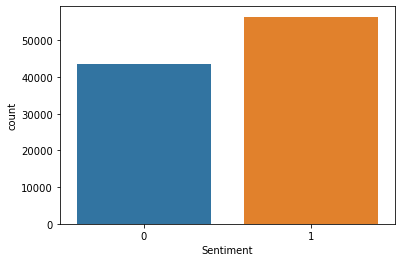

In [125]:
import seaborn as sns
sns.countplot(x='Sentiment', data=train)

In [126]:
# We will now take a look at random tweets to gain more insights

rand_indexs = np.random.randint(1,len(train),50).tolist()
train["SentimentText"][rand_indexs]

4768                                                                                                 Talk about being awakened onn the wrong side of the bed.
99631                        @Crownlessking badtimes mate  its not fair and nothing anyone can say is guna make it easier or better but we're here for you xx
29400                                                                                                                         @AClockworkToad How are you?   
29483                                                      @acryfromthesoul I know.  As long as my memory is still intact, I'll be able to relive it though. 
25399                                                                               @30STMWithJared ah that sucks  just going out now, I'll be on in a bit  x
63456                                                    @BMatt95 A users who doesnt know how to use the report button should not be on the forum. now GTFO! 
79016                                               

In [127]:
# We are gonna find what emoticons are used in our dataset

import re
tweets_text = train.SentimentText.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(3281, ':/'),
 (2874, 'x '),
 (2626, ': '),
 (1339, 'x@'),
 (1214, 'xx'),
 (1162, 'xa'),
 (984, ';3'),
 (887, 'xp'),
 (842, 'xo'),
 (713, ';)'),
 (483, 'xe'),
 (431, ';I'),
 (353, ';.'),
 (254, 'xD'),
 (251, 'x.'),
 (245, '::'),
 (234, 'X '),
 (217, ';t'),
 (209, ';s'),
 (185, ':O'),
 (176, ':3'),
 (166, ';D'),
 (159, ":'"),
 (157, 'XD'),
 (146, 'x3'),
 (142, ':p'),
 (126, ":'("),
 (118, ':@'),
 (117, 'xh'),
 (117, ':S'),
 (109, 'xm'),
 (104, ';p'),
 (104, ';-)'),
 (92, ':|'),
 (91, 'x,'),
 (89, ';P'),
 (76, 'xd'),
 (75, ';o'),
 (75, ';d'),
 (71, ':o'),
 (65, 'XX'),
 (63, ':L'),
 (59, 'Xx'),
 (59, ':1'),
 (58, ':]'),
 (57, ':s'),
 (56, ':0'),
 (54, 'XO'),
 (44, ';;'),
 (43, ';('),
 (38, ':-D'),
 (37, 'xk'),
 (36, 'XT'),
 (35, 'x?'),
 (35, 'x)'),
 (34, 'x2'),
 (33, ';/'),
 (32, 'x:'),
 (32, ':\\'),
 (31, 'x-'),
 (27, 'Xo'),
 (27, 'XP'),
 (27, ':-/'),
 (26, ':-P'),
 (25, ':*'),
 (23, 'xX'),
 (22, ":')"),
 (17, 'xP'),
 (16, ':['),
 (16, ':-p'),
 (14, 'x]'),
 (14, 'XM'),
 (13, ':-O'),
 (1

In [128]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(HAPPY_EMO, tweets_text)))
print("Sad emoticons:", set(re.findall(SAD_EMO, tweets_text)))

Happy emoticons: {';-D', ';p', ':p', ':d', 'x)', ':D', 'xD', ';D', ';P', ';d', ':-D', ';)', 'xd', 'XD', ';-)'}
Sad emoticons: {':/', ":'(", ':(', ':|'}


# Most Used Words

In [131]:
import nltk
from nltk.tokenize import word_tokenize
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [132]:
most_used_words(train.SentimentText.str.cat())[:100]

There is 129018 different words


['@',
 '!',
 '.',
 'I',
 ',',
 'to',
 'the',
 'you',
 '?',
 'a',
 'it',
 'i',
 ';',
 'and',
 '&',
 '...',
 'my',
 'for',
 'is',
 'that',
 "'s",
 "n't",
 'in',
 'me',
 'of',
 'have',
 'on',
 'quot',
 "'m",
 'so',
 ':',
 'but',
 '#',
 'do',
 'was',
 'be',
 '..',
 'not',
 'your',
 'are',
 'just',
 'with',
 'like',
 '-',
 'at',
 '*',
 'too',
 'get',
 'good',
 'u',
 'up',
 'know',
 'all',
 'this',
 'now',
 'no',
 'we',
 'out',
 ')',
 'love',
 'lol',
 'can',
 'what',
 'one',
 '(',
 'will',
 'go',
 'about',
 'did',
 'got',
 "'ll",
 'there',
 'amp',
 'day',
 'http',
 'see',
 "'re",
 'if',
 'time',
 'they',
 'think',
 'as',
 'when',
 'from',
 'You',
 'It',
 'going',
 'really',
 'well',
 'am',
 'work',
 'had',
 'would',
 'how',
 'he',
 'here',
 'thanks',
 'some',
 '....',
 'haha']

# Stop words


In [133]:
from nltk.corpus import stopwords
mw = most_used_words(train.SentimentText.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 129018 different words


In [134]:
# What we did is to filter only non stop words.
# We will now get a look to the top 1000 words

sorted(most_words)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '....',
 '.....',
 '......',
 '/',
 '1',
 '10',
 '100',
 '12',
 '1st',
 '2',
 '20',
 '2nd',
 '3',
 '30',
 '30SECONDSTOMARS',
 '4',
 '5',
 '6',
 '7',
 '8',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'AND',
 'Ah',
 'AlexAllTimeLow',
 'All',
 'Also',
 'Alyssa_Milano',
 'Am',
 'And',
 'Are',
 'As',
 'At',
 'Aw',
 'Awesome',
 'Aww',
 'Awww',
 'BSB',
 'Birthday',
 'But',
 'Ca',
 'Can',
 'Chris',
 'Come',
 'Congrats',
 'Cool',
 'D',
 'DM',
 'DO',
 'Damn',
 'Day',
 'Did',
 'Do',
 'Enjoy',
 'FF',
 'Follow',
 'FollowFriday',
 'For',
 'Friday',
 'Get',
 'Glad',
 'Go',
 'God',
 'Good',
 'Got',
 'Great',
 'Had',
 'Haha',
 'Happy',
 'Have',
 'He',
 'Hello',
 'Hey',
 'Hi',
 'Hope',
 'How',
 'I',
 'IS',
 'IT',
 'If',
 'Im',
 'In',
 'Is',
 'It',
 'Its',
 'July',
 'June',
 'Just',
 'Keep',
 'LA',
 'LMAO',
 'LOL',
 'LOVE',
 'Let',
 'Like',
 'Lol',
 'London',
 'Love',

# Stemming

In [135]:
# I'm defining this function to use it in the 
# Data Preparation Phase

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

# Preparing the data and Building the pipeline

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

In [138]:
# We need to do some preprocessing of the tweets.
# We will delete useless strings (like @, # ...)
# because we think that they will not help
# in determining if the person is Happy/Sad

class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        # mark emoticons as happy or sad
        X = X.str.replace(HAPPY_EMO, " happyemoticons ")
        X = X.str.replace(SAD_EMO, " sademoticons ")
        X = X.str.lower()
        return X

In [139]:
# This is the pipeline that will transform our tweets to something eatable.
# You can see that we are using our previously defined stemmer, it will
# take care of the stemming process.
# For stop words, we let the inverse document frequency do the job

from sklearn.model_selection import train_test_split

sentiments = train['Sentiment']
tweets = train['SentimentText']

# I get those parameters from the 'Fine tune the model' part
vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
pipeline = Pipeline([
    ('text_pre_processing', TextPreProc(use_mention=True)),
    ('vectorizer', vectorizer),
])

# Let's split our data into learning set and testing set
# This process is done to test the efficency of our model at the end.
# You shouldn't look at the test data only after choosing the final model
learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)

# This will tranform our learning data from simple text to vector
# by going through the preprocessing tranformer.
learning_data = pipeline.fit_transform(learn_data)

# Select a model

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

models = {
    'logitic regression': lr,
    'bernoulliNB': bnb,
    'multinomialNB': mnb,
}

for model in models.keys():
    scores = cross_val_score(models[model], learning_data, sentiments_learning, scoring="f1", cv=10)
    print("===", model, "===")
    print("scores = ", scores)
    print("mean = ", scores.mean())
    print("variance = ", scores.var())
    models[model].fit(learning_data, sentiments_learning)
    print("score on the learning data (accuracy) = ", accuracy_score(models[model].predict(learning_data), sentiments_learning))
    print("")

=== logitic regression ===
scores =  [0.81153101 0.81145066 0.8156682  0.81754471 0.80568606 0.81344092
 0.81390543 0.81293748 0.8033241  0.81273545]
mean =  0.811822402905744
variance =  1.6666957859036546e-05
score on the learning data (accuracy) =  0.8716567607726597

=== bernoulliNB ===
scores =  [0.78455616 0.79069221 0.78814155 0.79124737 0.79062134 0.78985251
 0.78147578 0.79114961 0.78709979 0.78803459]
mean =  0.7882870905034208
variance =  9.24495002469739e-06
score on the learning data (accuracy) =  0.9021030974968568

=== multinomialNB ===
scores =  [0.80468489 0.80586655 0.81460862 0.81336612 0.80725977 0.81054513
 0.80860167 0.80981595 0.80400445 0.81291484]
mean =  0.809166797181055
variance =  1.252018422636353e-05
score on the learning data (accuracy) =  0.8990598925591496



# Fine tune the model

In [141]:
# None of those models is likely to be overfitting, I will choose the multinomialNB.
# I'm going to use the GridSearchCV to choose the best parameters to use.
# What the GridSearchCV does is trying different set of parameters, and for
# each one, it runs a cross validation and estimate the score.
# At the end we can see what are the best parameter and use them to build a better classifier

In [142]:
from sklearn.model_selection import GridSearchCV

grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(learn_data, sentiments_learning)
print(grid_search.best_params_)

{'text_pre_processing__use_mention': True, 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}


# Test 

In [143]:
mnb.fit(learning_data, sentiments_learning)

MultinomialNB()

In [144]:
testing_data = pipeline.transform(test_data)
mnb.score(testing_data, sentiments_test)

0.7551088442177551

In [145]:
# Predecting on the test.csv

sub_data = pd.read_csv("test.csv", encoding='ISO-8859-1')
sub_learning = pipeline.transform(sub_data.SentimentText)
sub = pd.DataFrame(sub_data.ItemID, columns=("ItemID", "Sentiment"))
sub["Sentiment"] = mnb.predict(sub_learning)
print(sub)

        ItemID  Sentiment
0            1          0
1            2          0
2            3          0
3            4          0
4            5          0
...        ...        ...
299984  299996          1
299985  299997          1
299986  299998          1
299987  299999          1
299988  300000          1

[299989 rows x 2 columns]
